# Maryland schools star ratings analysis

By [Christine Zhang](mailto:czhang@baltsun.com)

An analysis of data from the [Maryland State Department of Education Report Card](http://mdreportcard.org/) for a December 4, 2018 Baltimore Sun story titled ["Maryland releases first star ratings for every public school; 60 percent earn four or five stars out of five"](https://www.baltimoresun.com/news/maryland/education/k-12/bs-md-star-rating-release-20181203-story.html) by Liz Bowie and Talia Richman.

Here are the key findings:

- Only 35 of the state's more than 1,300 schools received one star, the lowest rating, while 219 received five stars.
- In Baltimore City, 23 schools earned one star.
- More than half of the city’s schools received one- or two-star ratings.
- Howard County had 91 percent of its schools rated four and five stars, while Baltimore County had 96 of its 160 schools rated as four or five stars.
- In Harford County, 70 percent of schools earned either a four- or five-star rating.
- Fourteen school systems in the state had no one- or two-star schools.

## How we did it

### Import R data analysis libraries

In [1]:
suppressMessages(library('tidyverse'))
suppressMessages(library('janitor'))

Read in the scores data for analysis.

In [2]:
scores <- suppressMessages(read_csv('input/accountability_schools_download_file.csv', na = 'na') %>% clean_names())

### Finding: Only 35 of the state's more than 1,300 schools received one star, the lowest rating, while 219 received five stars.

Print the number of schools in the state dataset.

In [3]:
print(paste("There were", length(scores$school_name), 
            "public schools in the Maryland school system in the 2017-18 school year."))

[1] "There were 1319 public schools in the Maryland school system in the 2017-18 school year."


Use `table()` to view the breakdown of schools by star rating.

In [4]:
table(scores$star_rating)


  1   2   3   4   5 
 35 145 356 564 219 

### Finding: In Baltimore City, 23 schools earned one star.

Use `filter()` and `table()` to view the breakdown of schools in Baltimore City by star rating.

In [5]:
scores %>% filter(lea_name == 'Baltimore City') %>% select(star_rating) %>% table() 

.
 1  2  3  4  5 
23 76 45 19  3 

### Finding: More than half of the city’s schools received one- or two-star ratings.

Use `group_by()` and `summarise()` to calculate the percentage breakdown of schools by star rating. Save this into a dataframe called `scores.sum`.

In [6]:
scores.sum <- scores %>% group_by(lea_name, star_rating) %>% 
                         summarise(n = n()) %>%
                         mutate(percent = n/sum(n) * 100)

Use `filter()` to look just at Baltimore City.

In [7]:
scores.sum %>% filter(lea_name == 'Baltimore City')

lea_name,star_rating,n,percent
<chr>,<dbl>,<int>,<dbl>
Baltimore City,1,23,13.855422
Baltimore City,2,76,45.783133
Baltimore City,3,45,27.108434
Baltimore City,4,19,11.445783
Baltimore City,5,3,1.807229


Print the percentage of Baltimore City schools receiving one- or two-star ratings.

In [8]:
print(paste(round(scores.sum[scores.sum$star_rating == 1 & scores.sum$lea_name == 'Baltimore City', ]$percent + 
      scores.sum[scores.sum$star_rating == 2 & scores.sum$lea_name == 'Baltimore City', ]$percent), 
      "percent of the city's schools (more than half) received one- or two-star ratings."))

[1] "60 percent of the city's schools (more than half) received one- or two-star ratings."


### Finding: Howard County had 91 percent of its schools rated four and five stars, while Baltimore County had 96 of its 160 schools rated as four or five stars.

Use `filter()` on the `scores.sum` dataframe to view the number and percentage of schools in Howard and Baltimore County rated four or five stars.

In [9]:
scores.sum %>% filter(lea_name == 'Howard' | lea_name == 'Baltimore County')

lea_name,star_rating,n,percent
<chr>,<dbl>,<int>,<dbl>
Baltimore County,1,2,1.250000
Baltimore County,2,16,10.000000
Baltimore County,3,46,28.750000
Baltimore County,4,70,43.750000
Baltimore County,5,26,16.250000
Howard,1,1,1.351351
Howard,3,6,8.108108
Howard,4,36,48.648649
Howard,5,31,41.891892


Print the percentage of Howard County schools and the number of Baltimore County schools receiving one- or two-star ratings.

In [10]:
print(paste(round(scores.sum[scores.sum$star_rating == 4 & scores.sum$lea_name == 'Howard', ]$percent + 
      scores.sum[scores.sum$star_rating == 5 & scores.sum$lea_name == 'Howard', ]$percent), 
      "percent of Howard County schools received four- or five-star ratings."))

print(paste(scores.sum[scores.sum$star_rating == 4 & scores.sum$lea_name == 'Baltimore County', ]$n + 
      scores.sum[scores.sum$star_rating == 5 & scores.sum$lea_name == 'Baltimore County', ]$n, 
      "Baltimore County's", sum(scores.sum[scores.sum$lea_name == 'Baltimore County', ]$n),
      "schools received four- or five-star ratings."))

[1] "91 percent of Howard County schools received four- or five-star ratings."
[1] "96 Baltimore County's 160 schools received four- or five-star ratings."


### Finding: In Harford County, 70 percent of schools earned either a four- or five-star rating.

Use `filter()` on the `scores.sum` dataframe to view the number and percentage of schools in Harford County rated four or five stars.

In [11]:
scores.sum %>% filter(lea_name == 'Harford')

lea_name,star_rating,n,percent
<chr>,<dbl>,<int>,<dbl>
Harford,1,1,1.886792
Harford,2,1,1.886792
Harford,3,14,26.415094
Harford,4,27,50.943396
Harford,5,10,18.867925


Print the percentage of Harford County schools receiving one- or two-star ratings.

In [12]:
print(paste(round(scores.sum[scores.sum$star_rating == 4 & scores.sum$lea_name == 'Harford', ]$percent + 
      scores.sum[scores.sum$star_rating == 5 & scores.sum$lea_name == 'Harford', ]$percent), 
      "percent of Harford County schools received four- or five-star ratings."))

[1] "70 percent of Harford County schools received four- or five-star ratings."


Fourteen school systems in the state had no one- or two-star schools.

Use `group_by()` and `mutate()` to create a column, `lowest_rating`, which gives lowest rating received by a school in the LEA (local education agency). Use `filter()` to include school with a lowest rating of three stars or above — meaning they had no one- or two-star schools. Use `select()`, `distinct()`, `ungroup()` and `mutate()` to print out and tally LEAs aka school systems with no one- or two-star schools.

In [13]:
scores.sum %>% group_by(lea_name) %>% 
               mutate(lowest_rating = min(star_rating)) %>% 
               filter(lowest_rating >= 3) %>% 
               select(lea_name) %>% 
               distinct() %>% 
               ungroup() %>% mutate(row_number = row_number())

lea_name,row_number
<chr>,<int>
Allegany,1
Calvert,2
Caroline,3
Cecil,4
Charles,5
Frederick,6
Garrett,7
Kent,8
Queen Anne's,9


## Distribution of star ratings

Ratings are assigned to schools based on the number of points a school receives as a percentage of the total possible points it could earn:

- Less than 30% = one star
- 30% or more and less than 45% = two stars
- 45% or more and less than 60% = three stars
- 60% or more and less than 75% = four stars
- 75% or more = five stars

For more information, read the [story](https://www.baltimoresun.com/news/maryland/education/k-12/bs-md-star-rating-release-20181203-story.html).

Below are a histogram of star ratings, showing the schools that fell into each "earned points percent" bucket.

### Statewide

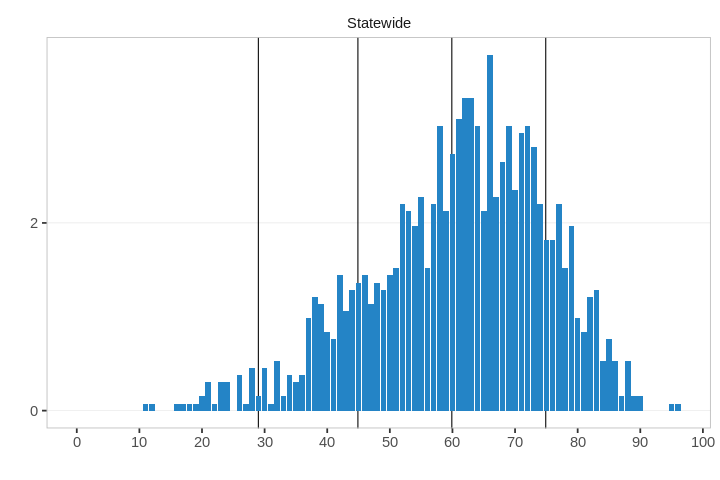

In [14]:
scores.grouped.points.md <- scores %>% group_by(total_earned_points_percent) %>% 
                             summarise(n = n()) %>% 
                             mutate(perc = n/sum(n) * 100) %>% mutate(lea_name = 'Statewide')

options(repr.plot.width = 6, repr.plot.height = 4)

ggplot(scores.grouped.points.md, aes(x = total_earned_points_percent, 
                           y = perc)) +
  geom_bar(stat = 'identity', fill = '#2484C6') +
  scale_y_continuous(breaks = seq(0, 10, 2))+
  geom_vline(xintercept = 29, size = .3)+
  geom_vline(xintercept = 44.9, size = .3)+
  geom_vline(xintercept = 59.9, size = .3)+
  geom_vline(xintercept = 74.9, size = .3)+
  geom_bar(stat = 'identity', fill = '#2484C6')+
  labs(x = '', y ='') +
  theme(panel.grid.major.x = element_blank(),
        panel.grid.minor.y = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.major.y = element_line(color = 'lightgrey', size = .1),
        panel.background = element_blank(),
        strip.background = element_blank(),
        panel.border = element_rect(fill = NA, colour = "grey")) +
  facet_wrap(~lea_name) + scale_x_continuous(breaks = seq(0, 100, 10)) + expand_limits(x = 0)

### Baltimore region, by county

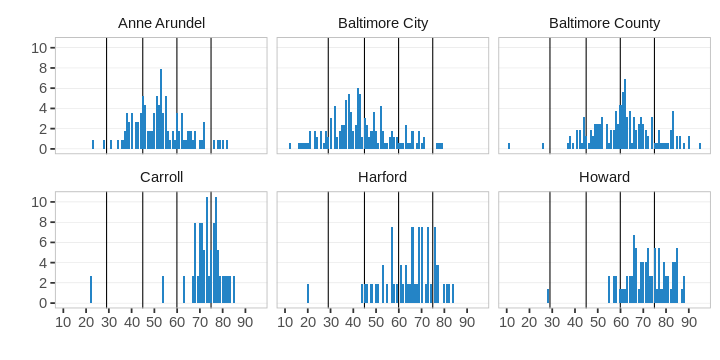

In [15]:
scores.grouped.points <- scores %>% group_by(lea_name, total_earned_points_percent) %>% 
                             summarise(n = n()) %>% 
                             mutate(perc = n/sum(n) * 100)

scores.grouped.filter <- scores.grouped.points %>% filter(lea_name == 'Baltimore City' |
                                           lea_name == 'Baltimore County' |
                                           lea_name == 'Anne Arundel' |
                                           lea_name == 'Carroll' |
                                           lea_name == 'Harford' |
                                           lea_name == 'Howard')

options(repr.plot.width = 6, repr.plot.height = 3)

ggplot(scores.grouped.filter, aes(x = total_earned_points_percent, 
                           y = perc)) +
  geom_bar(stat = 'identity', fill = '#2484C6') +
  scale_y_continuous(breaks = seq(0, 10, 2))+
  geom_vline(xintercept = 29, size = .3)+
  geom_vline(xintercept = 44.9, size = .3)+
  geom_vline(xintercept = 59.9, size = .3)+
  geom_vline(xintercept = 74.9, size = .3)+
  geom_bar(stat = 'identity', fill = '#2484C6')+
  labs(x = '', y ='') +
  theme(panel.grid.major.x = element_blank(),
        panel.grid.minor.y = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.major.y = element_line(color = 'lightgrey', size = .1),
        panel.background = element_blank(),
        strip.background = element_blank(),
        panel.border = element_rect(fill = NA, colour = "grey")) +
  facet_wrap(~lea_name) + scale_x_continuous(breaks = seq(0, 100, 10)) 